In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
!ls

gdrive	sample_data


In [ ]:
#packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import seaborn as sns
from sklearn import tree
from pprint import pprint

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/xxxxx')

In [ ]:
!ls


'DecisionTree Classifier.ipynb'  'DW ASSIGNMENT FINAL.csv'


In [ ]:
#importing datasets

In [ ]:
df = pd.read_csv("DW ASSIGNMENT FINAL.csv")

In [ ]:
df.head()

,SI NO,REGISTER NO,NAME,eng_math,dsa 1,dsa 2,dbms,CA,OS,SE,DD,OOPS,CN,CATEGORY,VALUE
0,1,1907001,ABINANDAN.V,O,A,A+,A+,A+,A+,O,O,O,O,DREAM,88
1,2,1907002,AKASH LOUIS.H,A+,B+,A,B+,A,A,A+,A+,O,A+,NON CORE,68
2,3,1907003,ARAVIND GOKUL.A,A,B+,A,A,B+,B+,A+,A,A,A,NON CORE,56
3,4,1907004,CHAKRABAANI.H,O,A,A,A+,A+,A+,O,A+,O,A+,DREAM,82
4,5,1907005,CLIFFORD LEBO.J,A+,A,A+,A+,A+,A,A+,O,O,O,DREAM,82


In [ ]:
#exploratory data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


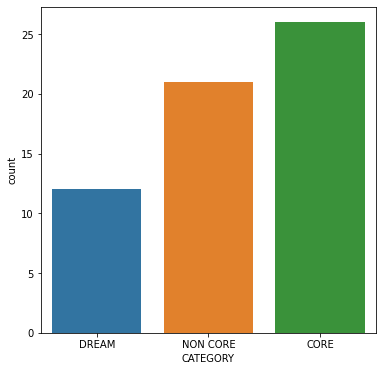

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['CATEGORY'])

In [ ]:
df.loc[df['CATEGORY'] == 'DREAM']

,SI NO,REGISTER NO,NAME,eng_math,dsa 1,dsa 2,dbms,CA,OS,SE,DD,OOPS,CN,CATEGORY,VALUE
0,1,1907001,ABINANDAN.V,O,A,A+,A+,A+,A+,O,O,O,O,DREAM,88
3,4,1907004,CHAKRABAANI.H,O,A,A,A+,A+,A+,O,A+,O,A+,DREAM,82
4,5,1907005,CLIFFORD LEBO.J,A+,A,A+,A+,A+,A,A+,O,O,O,DREAM,82
5,6,1907006,DARSHINI.B,A+,A,A+,A+,A+,A,A+,O,O,O,DREAM,82
12,13,1907013,HARIHARASUDHAN.S,A,A,A+,A+,A+,A+,A+,O,O,O,DREAM,82
14,15,1907015,JAIVANT ANNAAMALAI .S,O,B+,A+,A+,A+,A+,O,O,O,O,DREAM,86
18,19,1907019,KAUSIK SUBRAMANIYAM.G,A+,B+,A+,A+,A+,A+,A+,O,O,O,DREAM,82
23,24,1907024,MUKUNTH VAIBHAV.G,A+,A+,A+,A+,A+,A+,O,O,O,O,DREAM,88
31,32,1907032,PRIYANKA.S,A+,A,A+,A+,A+,A+,O,O,O,O,DREAM,86
33,34,1907034,RAHUL.K,O,A+,A+,A,A+,A+,A+,O,O,O,DREAM,86


In [ ]:
#grade detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


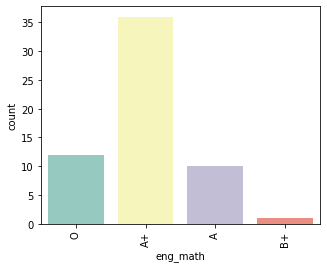

In [ ]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(df['eng_math'],palette="Set3")


In [ ]:
#Data pre-processing

In [ ]:
df.rename(columns = {'eng_math':'engineering mathematics'}, inplace = True)
df.head()

,SI NO,REGISTER NO,NAME,engineering mathematics,dsa 1,dsa 2,dbms,CA,OS,SE,DD,OOPS,CN,CATEGORY,VALUE
0,1,1907001,ABINANDAN.V,O,A,A+,A+,A+,A+,O,O,O,O,DREAM,88
1,2,1907002,AKASH LOUIS.H,A+,B+,A,B+,A,A,A+,A+,O,A+,NON CORE,68
2,3,1907003,ARAVIND GOKUL.A,A,B+,A,A,B+,B+,A+,A,A,A,NON CORE,56
3,4,1907004,CHAKRABAANI.H,O,A,A,A+,A+,A+,O,A+,O,A+,DREAM,82
4,5,1907005,CLIFFORD LEBO.J,A+,A,A+,A+,A+,A,A+,O,O,O,DREAM,82


In [ ]:
df = df.drop(["VALUE"], axis=1)
df.head()

,SI NO,REGISTER NO,NAME,engineering mathematics,dsa 1,dsa 2,dbms,CA,OS,SE,DD,OOPS,CN,CATEGORY
0,1,1907001,ABINANDAN.V,O,A,A+,A+,A+,A+,O,O,O,O,DREAM
1,2,1907002,AKASH LOUIS.H,A+,B+,A,B+,A,A,A+,A+,O,A+,NON CORE
2,3,1907003,ARAVIND GOKUL.A,A,B+,A,A,B+,B+,A+,A,A,A,NON CORE
3,4,1907004,CHAKRABAANI.H,O,A,A,A+,A+,A+,O,A+,O,A+,DREAM
4,5,1907005,CLIFFORD LEBO.J,A+,A,A+,A+,A+,A,A+,O,O,O,DREAM


In [ ]:
X = df.iloc[:, 3:13]
Y = df['CATEGORY']

In [ ]:
Y.head()

0       DREAM
1    NON CORE
2    NON CORE
3       DREAM
4       DREAM
Name: CATEGORY, dtype: object

In [ ]:
X.head()

,engineering mathematics,dsa 1,dsa 2,dbms,CA,OS,SE,DD,OOPS,CN
0,3,0,1,1,1,1,2,2,2,3
1,1,2,0,2,0,0,0,1,2,1
2,0,2,0,0,2,2,0,0,0,0
3,3,0,0,1,1,1,2,1,2,1
4,1,0,1,1,1,0,0,2,2,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
Y = lb.fit_transform(Y)

In [ ]:
X.head()

,engineering mathematics,dsa 1,dsa 2,dbms,CA,OS,SE,DD,OOPS,CN
0,3,0,1,1,1,1,2,2,2,3
1,1,2,0,2,0,0,0,1,2,1
2,0,2,0,0,2,2,0,0,0,0
3,3,0,0,1,1,1,2,1,2,1
4,1,0,1,1,1,0,0,2,2,3


In [ ]:
X.shape

(59, 10)

In [ ]:
Y.shape

(59,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [ ]:
#model creation

In [ ]:
class DecisionTreeClassifier:
    def __init__(self):
        # root represents the root node of the decision tree built after fitting the training data
        self.__root = None

    def __count_unique(self,Y):
        # returns a dictionary with keys as unique values of Y(i.e no of classes) and the corresponding value as its frequency
        d = {}
        for i in Y:
            if i not in d:
                d[i]=1
            else:
                d[i]+=1
        return d


    def __entropy(self,Y):
        # returns the entropy 
        freq_map = self.__count_unique(Y)
        entropy_ = 0
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            entropy_ += (-p)*math.log2(p)
        return entropy_

    def __gain_ratio(self,X,Y,selected_feature):
        # returns the gain ratio
        info_orig = self.__entropy(Y) # info_orig represents entropy before splitting
        info_f = 0  # info_f represents entropy after splitting upon the selected feature
        split_info = 0
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            info_f += (current_size/initial_size)*self.__entropy(df1[df1.shape[1]-1])
            split_info += (-current_size/initial_size)*math.log2(current_size/initial_size)

        # to handle the case when split info = 0 which leads to division by 0 error
        if split_info == 0 :
            return math.inf

        info_gain = info_orig - info_f
        gain_ratio = info_gain / split_info
        return gain_ratio

    def __gini_index(self,Y):
        # returns the gini index 
        freq_map = self.__count_unique(Y)
        gini_index_ = 1
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            gini_index_ -= p**2
        return gini_index_

    def __gini_gain(self,X,Y,selected_feature):
        # returns the gini gain
        gini_orig = self.__gini_index(Y) # gini_orig represents gini index before splitting
        gini_split_f = 0 # gini_split_f represents gini index after splitting upon the selected feature
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            gini_split_f += (current_size/initial_size)*self.__gini_index(df1[df1.shape[1]-1])

        gini_gain_ = gini_orig - gini_split_f
        return gini_gain_


    def __decision_tree(self,X,Y,features,level,metric,classes):
        # returns the root of the Decision Tree(which consists of TreeNodes) built after fitting the training data
        # Here Nodes are printed as in PREORDER traversl
        # classes represents the different classes present in the classification problem 
        # metric can take value gain_ratio or gini_index
        # level represents depth of the tree
        # We split a node on a particular feature only once (in a given root to leaf node path)
        
        
        # If the node consists of only 1 class
        if len(set(Y)) == 1:
            print("Level",level)
            output = None
            for i in classes:
                if i in Y:
                    output = i
                    print("Count of",i,"=",len(Y))
                else :
                    print("Count of",i,"=",0)
            if metric == "gain_ratio":
                print("Current Entropy is =  0.0")
            elif metric == "gini_index":
                print("Current Gini Index is =  0.0")

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        # If we have run out of features to split upon
        # In this case we will output the class with maximum count
        if len(features) == 0:
            print("Level",level)
            freq_map = self.__count_unique(Y)
            output = None
            max_count = -math.inf
            for i in classes:
                if i not in freq_map:
                    print("Count of",i,"=",0)
                else :
                    if freq_map[i] > max_count :
                        output = i
                        max_count = freq_map[i]
                    print("Count of",i,"=",freq_map[i])

            if metric == "gain_ratio":
                print("Current Entropy  is =",self.__entropy(Y))
            elif metric == "gini_index":
                print("Current Gini Index is =",self.__gini_index(Y))            

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        
        # Finding the best feature to split upon
        max_gain = -math.inf
        final_feature = None
        for f in features :
            if metric == "gain_ratio":
                current_gain = self.__gain_ratio(X,Y,f)
            elif metric =="gini_index":
                current_gain = self.__gini_gain(X,Y,f)

            if current_gain > max_gain:
                max_gain = current_gain
                final_feature = f

        print("Level",level)
        freq_map = self.__count_unique(Y)
        output = None
        max_count = -math.inf

        for i in classes:
            if i not in freq_map:
                print("Count of",i,"=",0)
            else :
                if freq_map[i] > max_count :
                    output = i
                    max_count = freq_map[i]
                print("Count of",i,"=",freq_map[i])

        if metric == "gain_ratio" :        
            print("Current Entropy is =",self.__entropy(Y))
            print("Splitting on feature  X[",final_feature,"] with gain ratio ",max_gain,sep="")
            print()
        elif metric == "gini_index":
            print("Current Gini Index is =",self.__gini_index(Y))
            print("Splitting on feature  X[",final_feature,"] with gini gain ",max_gain,sep="")
            print()

            
        unique_values = set(X[:,final_feature]) # unique_values represents the unique values of the feature selected
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe
        df[df.shape[1]] = Y

        current_node = TreeNode(final_feature,output)

        # Now removing the selected feature from the list as we do not want to split on one feature more than once(in a given root to leaf node path)
        index  = features.index(final_feature)
        features.remove(final_feature)
        for i in unique_values:
            # Creating a new dataframe with value of selected feature = i
            df1 = df[df[final_feature] == i]
            # Segregating the X and Y values and recursively calling on the splits
            node = self.__decision_tree(df1.iloc[:,0:df1.shape[1]-1].values,df1.iloc[:,df1.shape[1]-1].values,features,level+1,metric,classes)
            current_node.add_child(i,node)

        # Add the removed feature     
        features.insert(index,final_feature)

        return current_node
    
    def fit(self,X,Y,metric="gain_ratio"):
        # Fits to the given training data
        # metric can take value gain_ratio or gini_index
        features = [i for i in range(len(X[0]))]
        classes = set(Y)
        level = 0
        if metric != "gain_ratio" :
            if metric != "gini_index":
                metric="gain_ratio"  # if user entered a value which was neither gini_index nor gain_ratio
        self.__root = self.__decision_tree(X,Y,features,level,metric,classes)
        
    def __predict_for(self,data,node):
        # predicts the class for a given testing point and returns the answer
        
        # We have reached a leaf node
        if len(node.children) == 0 :
            return node.output

        val = data[node.data] # represents the value of feature on which the split was made       
        if val not in node.children :
            return node.output
        
        # Recursively call on the splits
        return self.__predict_for(data,node.children[val])

    def predict(self,X):
        # This function returns Y predicted
        # X should be a 2-D np array
        Y = np.array([0 for i in range(len(X))])
        for i in range(len(X)):
            Y[i] = self.__predict_for(X[i],self.__root)
        return Y
    
    def score(self,X,Y):
        # returns the mean accuracy
        Y_pred = self.predict(X)
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y[i]:
                count+=1
        return count/len(Y_pred)
    
    def export_tree_pdf(self,filename=None):
        # returns the tree as dot data
        # if filename is specified the function 
        # will save the pdf file in current directory which consists of the visual reresentation of the tree
        import pydotplus
        from collections import deque
        
        dot_data = '''digraph Tree {
node [shape=box] ;'''
        
        queue = deque()
        
        r = self.__root
        queue.append(r)
        count = 0
        if r.index == -1:
            r.index = count
        
        dot_data = dot_data + "\n{} [label=\"Feature to split upon : X[{}]\\nOutput at this node : {}\" ];".format(count,r.data,r.output) 
        
        # Doing LEVEL ORDER traversal in the tree (using a queue)
        while len(queue) != 0 :
            node = queue.popleft()
            for i in node.children:
                count+=1
                if(node.children[i].index==-1):
                    node.children[i].index = count
                
                # Creating child node
                dot_data = dot_data + "\n{} [label=\"Feature to split upon : X[{}]\\nOutput at this node : {}\" ];".format(node.children[i].index,node.children[i].data,node.children[i].output) 
                # Connecting parent node with child
                dot_data = dot_data + "\n{} -> {} [ headlabel=\"Feature value = {}\"]; ".format(node.index,node.children[i].index,i)
                # Adding child node to queue
                queue.append(node.children[i])
        
        dot_data = dot_data + "\n}"

        if filename != None:    
            graph = pydotplus.graph_from_dot_data(dot_data)
            graph.write_pdf(filename)    
        
        return dot_data

In [ ]:
class TreeNode:
    def __init__(self, data,output):
        # data represents the feature upon which the node was split when fitting the training data
        # data = None for leaf node
        self.data = data
        # children of a node are stored as a dicticionary with key being the value of feature upon which the node was split
        # and the corresponding value stores the child TreeNode
        self.children = {}
        # output represents the class with current majority at this instance of the decision tree
        self.output = output
        # index will be used to assign a unique index to each node
        self.index = -1
        
    def add_child(self,feature_value,obj):
        self.children[feature_value] = obj

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model1.score(x_train,y_train)

0.9811320754716981

In [ ]:
x_train.shape

(53, 10)

In [ ]:
y_train.shape

(53,)

In [ ]:
y_pred = model1.predict(x_train)

In [ ]:
#model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = model1.score(x_train,y_train)
matrix = confusion_matrix(y_pred,y_train)

In [ ]:
print("The accuracy is ",accuracy)

The accuracy is  0.9811320754716981


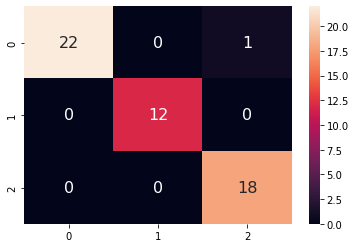

In [ ]:
sns.heatmap(matrix, annot=True,annot_kws={"size": 16})

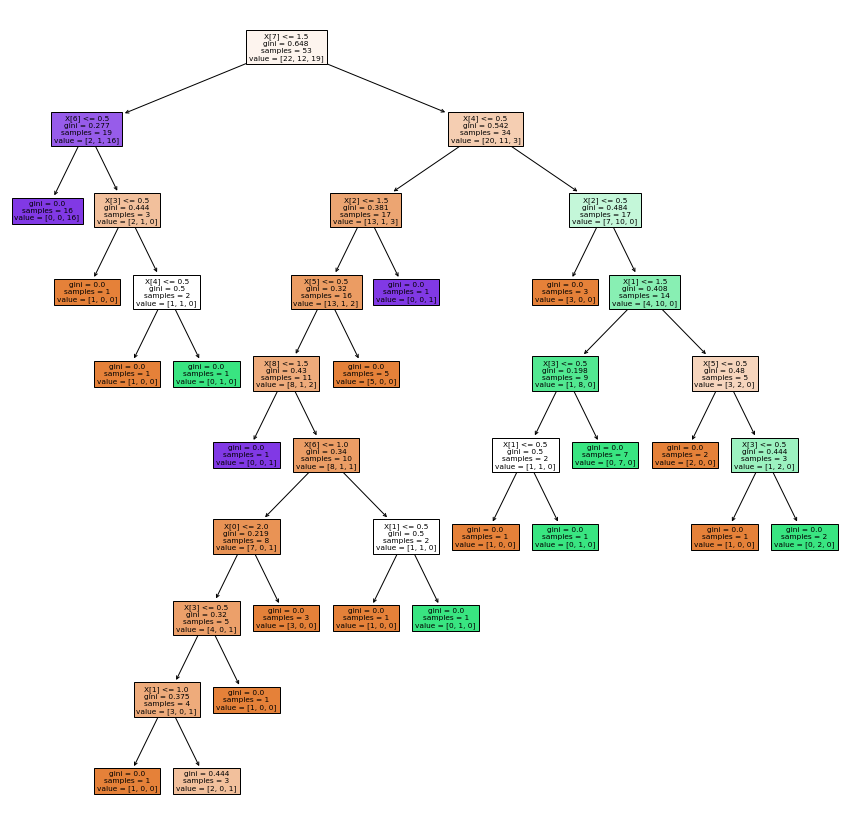

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model1, 
                   filled=True)